In [45]:
import numpy as np
import h5py
from obspy.core import read
st = read('/home/irene/Documents/Datos-Tesis/Estaciones/*HHZ*')
count = 1
for tr in st:
    transformed_path = '/home/irene/Documents/Datos-Tesis/Training/training_data_' + str(count)
    if 'a' in tr.stats.sac and tr.stats.sac.a is not None:
        print
        data = np.array(tr.data)
        print(len(data), tr.stats.station, tr.stats)
        data_transformed = np.zeros(len(data))
        picker_p = int(tr.stats.sac.a * 100)
        data_transformed[picker_p] = 1
        
#         h5f = h5py.File(transformed_path)
#         h5f.create_dataset('normal', data=data)
#         h5f.create_dataset('transformed', data=data_transformed)
#         h5f.close()
#         count = count + 1
# h5f = h5py.File('/home/irene/Documents/Datos-Tesis/Training/training_data_1', 'r')
# np.unique(h5f['transformed'][:])

60000 CALV          network: 
         station: CALV
        location: 
         channel: HHZ
       starttime: 2018-12-03T16:57:18.000000Z
         endtime: 2018-12-03T17:07:17.990000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 60000
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.0099999998, 'depmin': -235640.0, 'depmax': 285067.0, 'b': 0.0, 'e': 599.98999, 'o': 120.446, 'a': 122.57545, 't0': 122.59687, 't1': 123.79385, 't2': 123.87, 't3': 231.10199, 't4': 232.31691, 't5': 232.36, 't6': 254.55367, 't7': 255.7191, 't8': 255.77, 't9': 415.5831, 'stla': 9.7417002, 'stlo': -83.933197, 'stel': 2052.0, 'stdp': 0.0, 'evla': 9.7535, 'evlo': -83.969299, 'evdp': 5915.1001, 'dist': 4.1707301, 'az': 108.23269, 'baz': 288.23877, 'gcarc': 0.037469737, 'depmen': -1262.3212, 'cmpaz': 0.0, 'cmpinc': 0.0, 'nzyear': 2018, 'nzjday': 337, 'nzhour': 16, 'nzmin': 57, 'nzsec': 18, 'nzmsec': 0, 'nvhdr': 6, 'norid': 0, 'nevid': 0, 'npts': 60000, 'ifty

99 Trace(s) in Stream:

.BATAN..HHZ | 2018-12-03T16:57:18.000000Z - 2018-12-03T17:07:17.990000Z | 100.0 Hz, 60000 samples
...
(97 other traces)
...
.VPTE..HHZ | 2018-12-03T16:57:18.000000Z - 2018-12-03T17:07:17.990000Z | 100.0 Hz, 60000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


array([ 0.,  1.])

In [13]:
import matplotlib.pyplot as plt
from obspy.signal.filter import bandpass
from obspy.core import read



tr = read('/home/irene/Documents/Datos-Tesis/Estaciones/CNKC.HHZ.2018.337.16.57.18.sac')[0]
print(tr.)
# p_index = int(tr.stats.sac.a * tr.stats.sampling_rate)

# tr.filter('bandpass', freqmin=1.0, freqmax=10.0, corners=4, zerophase=True)
# tr.normalize()
# plt.plot(tr.data)

# plt.axvline(x=p_index, color='red')
# plt.show()

.CNKC..HHZ | 2018-12-03T16:57:18.000000Z - 2018-12-03T17:07:17.990000Z | 100.0 Hz, 60000 samples


In [5]:
len(tr.data)

AttributeError: 'Stream' object has no attribute 'data'

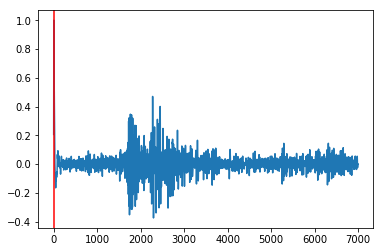

atime_pick:  2019-03-29T14:54:26.912292Z
starttime:  2019-03-29T14:45:11.000000Z
start 2019-03-29T14:54:21.912292Z
end 2019-03-29T14:54:31.912292Z


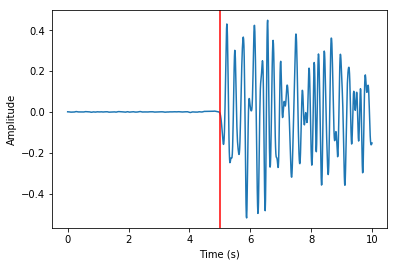

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from obspy.core import read, UTCDateTime
from obspy.io.sac.util import get_sac_reftime
from obspy.signal.filter import lowpass, bandpass, highpass

prev_time = 5.0
post_time = 5.0

total_time = prev_time + post_time


tr = read('/home/irene/Documents/Datos-Tesis/Estaciones/HAYA.HHZ.2019.088.14.45.11')[0]
ref_time_event = get_sac_reftime(tr.stats.sac)
atime_pick = ref_time_event + tr.stats.sac.a
print("atime_pick: ", atime_pick)
ini_cut = atime_pick - prev_time
print("starttime: ", tr.stats.starttime)
end_cut = atime_pick + post_time

tr.filter('bandpass', freqmin=1.0, freqmax=10.0, corners=4, zerophase=True)
tr.normalize()
tr.trim(starttime = ini_cut, endtime = end_cut, nearest_sample=True, pad=True, fill_value=0)
picker_p = int(tr.data.shape[0] * (prev_time/total_time)/tr.stats.sampling_rate)

print("start", ini_cut)
print("end", end_cut)

plt.plot(tr.times(), tr.data)

plt.axvline(x=picker_p , color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()
               

In [157]:
tr.times().shape
tr.data.shape
picker_p

5

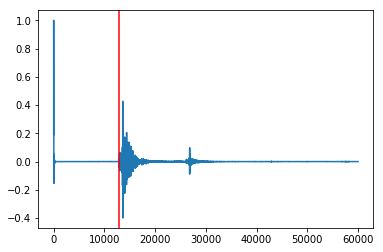

In [2]:
import matplotlib.pyplot as plt
from obspy.signal.filter import bandpass
from obspy.core import read

tr = read('/home/irene/Documents/Datos-Tesis/Estaciones/VBPN.HHZ.2018.337.16.57.18.sac')[0]
p_index = int(tr.stats.sac.a * tr.stats.sampling_rate)

tr.filter('bandpass', freqmin=1.0, freqmax=10.0, corners=4, zerophase=True)
tr.normalize()
plt.plot(tr.data)

plt.axvline(x=p_index, color='red')
plt.show()

atime_pick:  2018-12-03T16:59:27.811188Z
starttime:  2018-12-03T16:57:18.000000Z
picker_p:  12981
stats.sac:  AttribDict({'delta': 0.0099999998, 'depmin': -87376.0, 'depmax': 83256.0, 'b': 0.0, 'e': 599.98999, 'o': 120.446, 'a': 129.81119, 't0': 130.0284, 't1': 262.00839, 't2': 268.96838, 'stla': 9.3825998, 'stlo': -83.677498, 'stel': 807.0, 'stdp': 0.0, 'evla': 9.7535, 'evlo': -83.969299, 'evdp': 5915.1001, 'dist': 52.049294, 'az': 141.99028, 'baz': 322.03845, 'gcarc': 0.46760786, 'depmen': 8228.999, 'cmpaz': 0.0, 'cmpinc': 0.0, 'nzyear': 2018, 'nzjday': 337, 'nzhour': 16, 'nzmin': 57, 'nzsec': 18, 'nzmsec': 0, 'nvhdr': 6, 'norid': 0, 'nevid': 0, 'npts': 60000, 'iftype': 1, 'idep': 7, 'iztype': 10, 'isynth': 49, 'leven': 1, 'lpspol': 0, 'lovrok': 1, 'lcalda': 1, 'kstnm': 'PEZE    ', 'ka': '        ', 'kt0': 'P       ', 'kt1': 'P       ', 'kt2': 'S       ', 'kcmpnm': 'HHZ     ', 'kevnm': '        '})


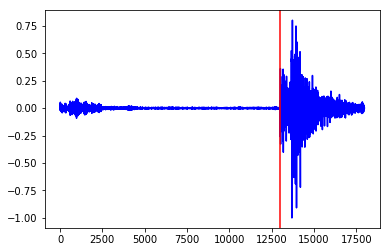

In [88]:
import numpy as np 
import matplotlib.pyplot as plt
from obspy.core import read, UTCDateTime
from obspy.io.sac.util import get_sac_reftime
from obspy.signal.filter import lowpass, bandpass, highpass



tr = read('/home/irene/Documents/Datos-Tesis/Estaciones/PEZE.HHZ.2018.337.16.57.18.sac')[0]
ref_time_event = get_sac_reftime(tr.stats.sac)
atime_pick = ref_time_event + tr.stats.sac.a
print("atime_pick: ", atime_pick)
ini_cut = atime_pick
print("starttime: ", tr.stats.starttime)
end_cut = atime_pick + 50.0
picker_p = int(tr.stats.sac.a * tr.stats.sampling_rate)
print("picker_p: ", picker_p)
print("stats.sac: ", tr.stats.sac)

tr.trim(starttime = tr.stats.starttime , endtime = end_cut, nearest_sample=True, pad=True, fill_value=0)
tr.filter('bandpass', freqmin=1.0, freqmax=10.0, corners=4, zerophase=True)
tr.normalize()

data = tr.data
data = data

plt.plot(tr.data, color='blue')

plt.axvline(x=picker_p, color='red')
plt.show()

In [72]:
tr.data.shape

(17982,)

In [76]:
tr.data[tr.data >= 0] = 0

(9012,)

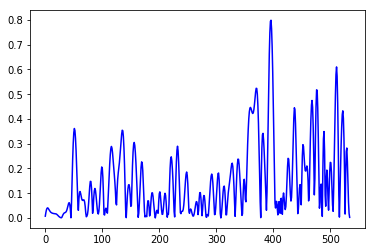

In [83]:
plt.plot(tr.data[tr.data >= 0], color='blue')

#plt.axvline(x=picker_p - (tr.data.shape[0]-9012), color='red')
plt.show()

In [19]:
import numpy as np
import h5py
import os
from obspy.core import read, UTCDateTime
from obspy.io.sac.util import get_sac_reftime
from obspy.signal.filter import lowpass, bandpass, highpass

base_path = '/home/irene/Documents/Datos-Tesis/Estaciones/'
output_path = '/home/irene/Documents/Datos-Tesis/Training_window_station_name/'

for file_name in os.listdir(base_path):
    tr = read(os.path.join(base_path, file_name))[0]
    if 'a' in tr.stats.sac and tr.stats.sac.a is not None:
        tr
    else :
        print(file_name)

PIRO.HHZ.2018.337.16.57.18.sac
DUNO.HHZ.2019.088.14.45.11
VRBA.HHZ.2019.088.14.45.11
BATAN.HHZ.2018.337.16.57.18.sac
VRLE.HHZ.2019.088.14.45.11
ORTG.HHZ.2019.088.14.45.11


TypeError: Unknown format for file /home/irene/Documents/Datos-Tesis/Estaciones/PIRO.HHZ.2018.337.16.57.18.sac.png